## EXPLORE Data Science Academy Classification Hackathon

## Introduction 

### 
South Africa is a multicultural society with rich linguistic diversity, where language plays a crucial role in enhancing democracy and shaping various aspects of societal life. The nation is multilingual, boasting 11 official languages, each enjoying equal status. The majority of South Africans are multilingual, proficient in speaking two or more official languages. This linguistic diversity contributes significantly to the social, cultural, intellectual, economic, and political dimensions of South African society.


## Problem Statement:

The objective of this project is to leverage Natural Language Processing (NLP) to develop a model capable of accurately determining the language of a given text among the 11 official languages of South Africa. The model should be designed to handle text inputs in any of these languages and provide predictions with high accuracy. This language identification system can find applications in various contexts, such as content categorization, user interface personalization, and linguistic analysis.

## Importing Libraries

In [2]:
# Database manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

# libraries for data processing
import nltk
from nltk.corpus import stopwords, wordnet
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Packages to create models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#Packages for data modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

#Packafes to assess the accuracy of the models
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.utils import resample


### loading the data
on this project a dataset about south Africa languege diversity This dataset will be used for  the classification lets Read the data and take a look at it.

In [3]:
df = pd.read_csv('train_set.csv')
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df.shape

(33000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


*1* It is observed from the results above that the dataset has 2 rows with object datatype


*2* There are no missing values in the dataset

In [6]:
test_df = pd.read_csv('test_set.csv')
test_df.shape

(5682, 2)

In [7]:
#Viewing a slice of the datframe
print("First 5 rows of the train data")
display(df.tail())

print('First 5 rows of the test data')
display(test_df.tail())

First 5 rows of the train data


,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


First 5 rows of the test data


,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


The test data set is observed to have one extra column named 'index'

In [8]:
#Checking for the number of unique Languages in the dataset
df['lang_id'].nunique()

11

In [9]:
#Checking for unique languages
df['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

The response variable has 11 uniques values, which are the 11 official languages in South Africa



In [10]:
#Calculating the count for each response value
df['lang_id'].value_counts()

lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

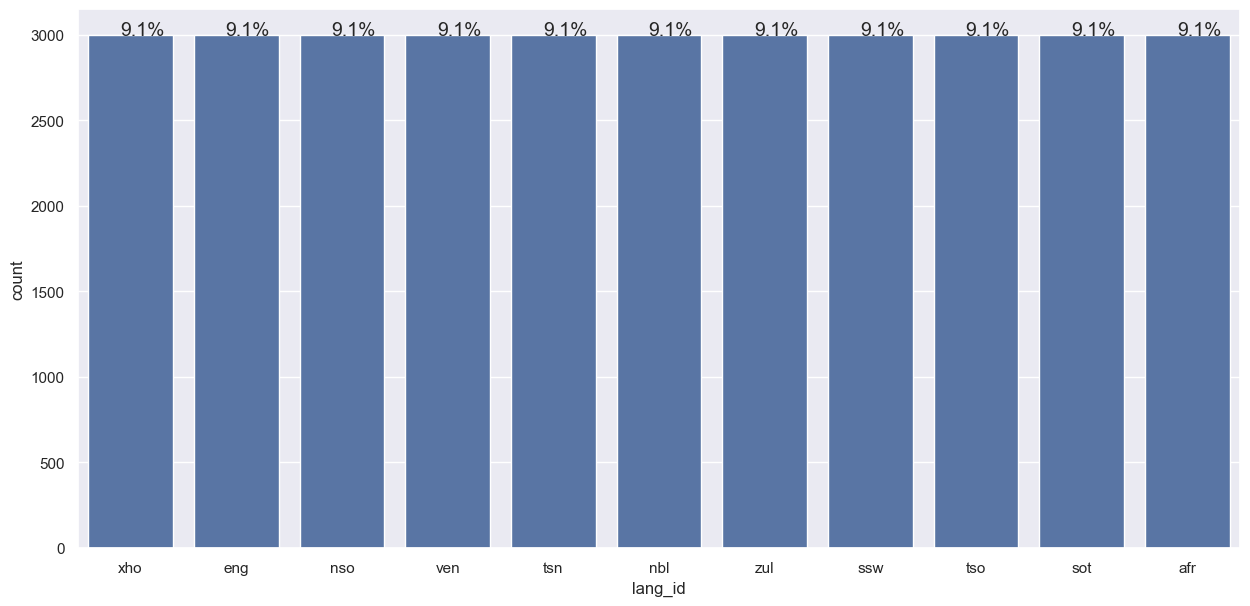

In [11]:
Responses = df['lang_id']
 #Creating a countplot for the response values
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.countplot(x=Responses, data=df)
    
total = len(Responses) # length of the column
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the languages
    x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
    y = p.get_y() + p.get_height()           # heightt of the plot
    ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
plt.show() # show the plot

The results above (Value_count and Bar graph) show that the data for the different classes is balanced and therefore there will be no need for resampling.

## Data Exploration

In [12]:
#LLooking into the 
count = df.groupby("lang_id").count()["text"].reset_index().sort_values(by="lang_id", ascending=True)
display(count.style.background_gradient(cmap="Blues"))


,lang_id,text
0,afr,3000
1,eng,3000
2,nbl,3000
3,nso,3000
4,sot,3000
5,ssw,3000
6,tsn,3000
7,tso,3000
8,ven,3000
9,xho,3000


In [15]:
# Plot Class Distributions:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x=df['lang_id'].unique(), y=df['lang_id'].value_counts())
plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 33000 and the vector passed to `x` has length 11.

<Figure size 700x400 with 0 Axes>

Looks close to a perfectly balanced data to train with ! - All class have equal number of observations

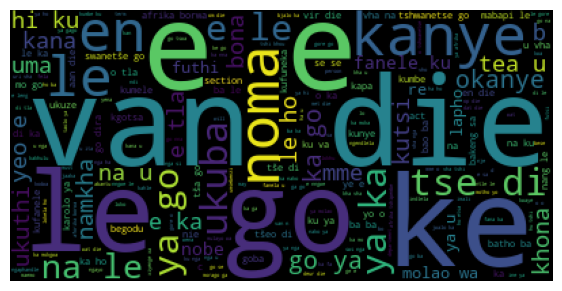

In [16]:
#Display the most recurrent words across all observations in a wordcloud image
full_text = " ".join(df['text'])

wc = WordCloud(background_color='black')
img = wc.generate(full_text)
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis('off')
plt.show()

A lot of repeating single letter and double letter words. This insight will be applied during cleaning to remove words with less that 3 characters

15.0
7.0


<Axes: ylabel='count'>

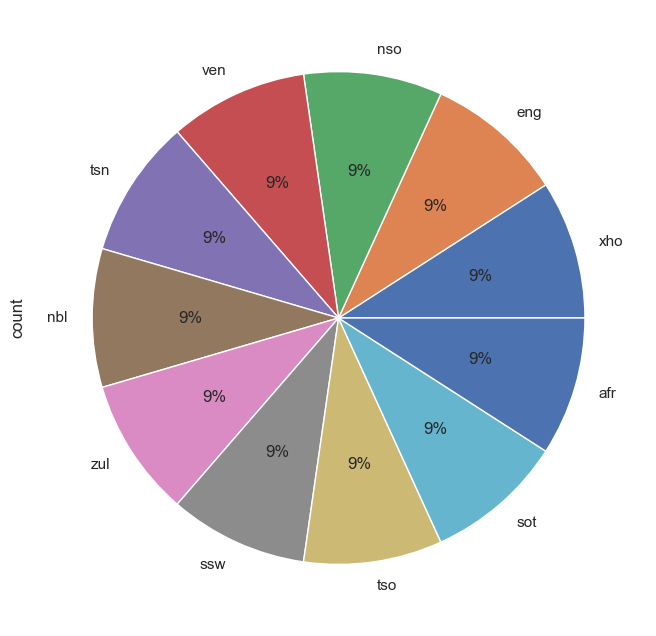

In [17]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 

#  distribution of sentenses from the dataset
df.lang_id.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [18]:
#Check out a slice in the text lenght for each observation to determine what cleaning needs to be done.
for text in test_df['text'][2000:2010]:
    print(text)

mabalane wa khothe ya ndinganyiso' zwi amba mabalane wa khothe ya ndinganyiso o tholiwaho kana o nangiwaho u ya nga khethekanyo 17, yo vhalwaho na khethekanyo 31, yo katela na zwi.
Khethululo zwi songo tea kha u. etshedza dzimbuelo, dzitshomedzo dzine dza tshimbilelana na ndindakhombo.
Komiti ya Tshepetšo: E thuša BOT mo go netefatšeng tshepetšo e botse ya setlamo, bjale ka go kgoboketša ditefelo, ditefelo tša dikgopelo le tlhokomelo ya direkhoto tša leloko. Komiti gape e thuša BOT ka thekišo le kwalakwatšo.
Indlu yowiso-mthetho yephondo ingaphumeza umgaqo-siseko wephondo okanye, apho kufunekayo, ingawutshintsha umgaqo-siseko wayo, ukuba, ubuncinane, isibini kwisithathu samalungu ayo avotela ukuwuvuma uMthetho oYilwayo wokwenjenjalo.
Ngano dza tsiko.
<fn>GOV-ZA.WQFlyer_afr.2010-03-25.af.txt</fn>
Mfuwo, vukhongeri na tindzimi: Vaaki va nga tiphina hi mfuwo wa vona, va landzelela vukhongeri bya vona no tirhisa ririmi ra vona.
Ukubonelela kunye nokukhusela ulimo kwiifama.
Bakeng sa ho tsw

#### Although the data looked clean enough at first glance, the following observations were made:
- The text still contains numbers and special characters as seen above.
- Some lines contain two or more languages. This will likely inhibit a 100% prediction accuracy.
- The local languages have compound words whose meaning may be affected by punctutaions cleaning.
- Train data set is perfectly balanced

## Data pre-processing

The objective of the these steps are to ensure that the data inputed into the model is in the most useful form. This is important so we can extract maximum information. To this, we will be:

* Removing punctuation from each sentence in the predictor variable.
* Retaining only alphabetic words i.e. exclude numbers and alphanumeric letters.
* Removing of common English stop words.
* Eliminating all one-lettered words eg a, i etc
* Converting all of the words to lower case for consistency.



In [19]:
def clean_text(text):
    # replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
    
    #Removal of numbers
    text = re.sub(r'\d+', ' ', text)
    
    # will replace newline with space
    text = re.sub("\n"," ",text)
    
    # will convert to lower case
    text = text.lower()
    
    # will split and join the words
    text=' '.join(text.split())
    
    return text

In [20]:
# Application of the function to clean the texts
df['clean_text'] = df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

In [21]:
# Replace '.txt' with 'text file'
df["clean_text"] = df["clean_text"].str.replace(".txt", " text file")
test_df["clean_text"] = test_df["clean_text"].str.replace(".txt", " text file")

In [22]:
df.head(10)

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,fa le dirisiwa lebone le tshwanetse go bontsha...


In [23]:
test_df.head(10)

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee...","ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...,( am) final gems birthing options_zulu text file
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...,ntjhafatso ya konteraka ya mosebetsi: etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...,u-gems uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused.","so, on occasion, are statistics misused."


 ## Data Engineering

* The next step is to do some Data Engineering. The purpose of this is to ensure that the data is cleaned and prepared for the subsequent stage of modeling.

#### Tokenization

In [24]:
from nltk.tokenize import TreebankWordTokenizer


In [25]:
# Converting text into Tokens(word-lists):
tokenizer = TreebankWordTokenizer()
df['clean_text'] =df['clean_text'].apply(tokenizer.tokenize)

# Display the DataFrame after Tokenization:
df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqo-siseko, wenza, amalungiselelo, kumazik..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[i-dha, iya, kuba, nobulumko, bokubeka, umsebe..."
2,eng,the province of kwazulu-natal department of tr...,"[the, province, of, kwazulu-natal, department,..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


Stopword Removal
These are words that occur frequently in sentences, however, they do not contribute much to the information in a sentence. By stripping away these words, the low-level information is removed from the data, allowing the focus to remain on the important information.
 For this task, the nltk Library's Stopword Dictionary will be used for reference.

## Stopword Removal
These are words that occur frequently in sentences, however, they do not contribute much to the information in a sentence. By stripping away these words, the low-level information is removed from the data, allowing the focus to remain on the important information. For this task, the nltk Library's Stopword Dictionary will be used for reference.

In [26]:
# Define Function to Remove Stopwords:
def chop_stopwords(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [27]:
# Removing StopWords from the data:
df['clean_text'] = df['clean_text'].apply(chop_stopwords)

## Lemmatization

In [ ]:
from nltk.stem import ordNetLemmatizer

: 

In [28]:
# Lemmatize the text Messages:
lemmatizer = WordNetLemmatizer()
df['clean_text'] = df['clean_text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
df.head()

NameError: name 'WordNetLemmatizer' is not defined

The Data Engineering phase has been completed, perhaps the new tokenized column should be reverted back to its normal state. This would show the new cleaner state of our data much more clearly

In [33]:
# Revert back to sentence:
for i in range(len(df['clean_text'])):
    df['clean_text'][i] = " ".join(df['clean_text'][i])

# Display Dataframe:
df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,u m g a q o - s i s e k o w e n z a a m a ...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i - d h a i y a k u b a n o b u l u m k ...
2,eng,the province of kwazulu-natal department of tr...,p r o v i n c e k w a z u l u - n a t a l ...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,n e t e f a t š a g o r e b a f i l e ...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,k h o m i s h i n i y a n d i n g a n y i ...


## Modelling

##### Split Data Into Features and Labels:

In [34]:
# Define Features and Labels:
X = df['clean_text'] # Features
y = df['lang_id'] # Labels

#### Bag of Words:

In [31]:
# Create Vectorizer Instance:
vect = TfidfVectorizer()                                             

In [35]:
#Vectorizing
vector = TfidfVectorizer(min_df=5)

#Vectorizing train data
vector.fit(df['text'])

In [ ]:
train_tfidf = vector.transform(df['text'])
test_tfidf = vector.transform(df_shape['text'])

: 

In [ ]:
display(train_tfidf.shape)
display(test_tfidf.shape)

In [ ]:
#Transform vectorized train data to a dataframe
vectorized_train_df = pd.DataFrame(train_tfidf.todense(), columns=vector.get_feature_names_out())

#Transform vectorized test data to a dataframe
vectorized_test_df = pd.DataFrame(test_tfidf.todense(), columns=vector.get_feature_names_out())

In [ ]:
vectorized_train_df.head()

In [ ]:
#Training dataset
train_feat = vectorized_train_df[:len(df)]
train_target = df['lang_id']

#Test dataset
test_features =  vectorized_test_df[:len(df_test):]

: 

In [29]:
X_train, X_test, y_train, y_test =train_test_split(train_feat, 
                                                   train_target, 
                                                   test_size=0.2, 
                                                   random_state=50)

NameError: name 'train_feat' is not defined

In [ ]:
# Set up selector, choosing score function and number of features to retain
selector = SelectKBest(score_func=f_classif, k=21000)

# Transform (i.e.: run selection on) the training data
fit = selector.fit(X_train, y_train)

#Selecting the Best k features from the train dataset
X_train_kbest = X_train[X_train.columns[selector.get_support(indices=True)]]
X_test_kbest = X_test[X_test.columns[selector.get_support(indices=True)]]

: 

In [ ]:
#Select same columns for test dataset as above
select_columns = X_test_kbest.columns
cols = list(select_columns)

#Selecting the Best k features from the test dataset
test_features_kbest = test_features[cols]

## Modelling
Three models will be separately tried out and the best will be picked based in f1 score on the train and test predictions.

* Logistic Regression
* Gaussian Naive Bayes
* Multinomial Naive Bayes

In [ ]:
#Train a Logistic regression model 
logreg = LogisticRegression(random_state=50)

#Fitting
logreg.fit(X_train_kbest, y_train)

#Validate
y_pred_test = logreg.predict(X_test_kbest)

In [ ]:
# Generate predictions from test data using Logistic regression model
y_pred_LR = logreg.predict(test_features_kbest)

#f1 score on train
f1_score_LR = metrics.f1_score(y_test, y_pred_test, average='macro')
f1_score_LR

In [ ]:
#Train a Gaussian Naive Bayes model 
GNB = GaussianNB()

#Fitting
GNB.fit(X_train_kbest, y_train)

#Validate
y_pred_test_GNB = GNB.predict(X_test_kbest)

In [ ]:
# Generate predictions from test data using Gaussian Naive Bayes model
y_pred_test_GNB1 = GNB.predict(test_features_kbest)

#f1 score on train
f1_score_GNB = metrics.f1_score(y_test, y_pred_test_GNB, average='macro')
f1_score_GNB

In [ ]:
#Train a Multinomial Naive Bayes model 
model = MultinomialNB(alpha=0.2)

#Fitting
model.fit(X_train_kbest, y_train)
run_time = %timeit -q -o model.fit(X_train_kbest, y_train)

#Validate
y_pred_MNB = model.predict(X_test_kbest)

print("Multinomial NB Classifier Training time:", run_time )

In [ ]:
# Generate predictions from test data using Gaussian Naive Bayes model
y_pred_MNB1 = model.predict(test_features_kbest)

#f1 score on train
f1_score = metrics.f1_score(y_test, y_pred_MNB, average='macro')
display(f1_score)
#Accuracy
accuracy  = metrics.accuracy_score(y_test, y_pred_MNB)
display(accuracy)

In [ ]:
#Creating a submission

submission_df = pd.DataFrame({"index": test_df['index'],
    "lang_id": y_pred_MNB1})
submission_df.to_csv('submissionMNBfinal.csv', index=False)

In [ ]:
sub_temp = pd.read_csv('submissionMNBFinal.csv')
sub_temp.head()

: 

## Model Selection & Explanation
The Multinomial Naive Bayes will be selected for the purpose of this exercise, based on the models that have been tried for the following reasons:

* Prediction on the train dataset and the unseen data gave a better f1 score.
* Run time was lower, which indicates a lower computing requirement and speed of processing.
* Being a probability algorithm, it is simple to implement and pretty straight-forward.
The Multinomial Naive Bayes algorithm is a Bayesian learning approach in which a program guesses the tag of a text using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

The Naive Bayes classifier is made up of a number of algorithms that all have one thing in common: each feature being classed is unrelated to any other feature. A feature's existence or absence has no bearing on the inclusion or exclusion of another feature.

## Hyperparameter Tuning on Multinomial Naive Bayes

In [ ]:
#Hyperparameter tuning using GridSearchCV
search_space = {"alpha": [0.2, 0.5, 1.0],
                "fit_prior": [True, False]
               }

In [ ]:
GS = GridSearchCV(estimator = model,
                 param_grid = search_space,
                 scoring = "f1",
                 cv = 5,
                 verbose = 4)

In [ ]:
GS.fit(X_train_kbest, y_train)

In [ ]:
GS.best_params_